# Median Housing Price and the 2008 Recession
# A Data Investigation by Eric Gordon

**How did the 2008 Recession Affect the the Price of Houses Throughout America?
Which Cities Were Hit the Hardest?** 

This project looks to answer these two questions, and investigate other data publically availible online. Because this data is a cross analysis of the economic prosperity of the United States, and the median house sale price of homes, there will be two major sources of data.

First, to investigate the recession and prosperity of the american economy, 

**Data**
* From Bureau of Economic Analysis, US Department of Commerce, the "Current-dollar and 'real' GDP" file [from this website.](http://www.bea.gov/national/index.htm#gdp) This file gives historical GDP levels of the United States in quarterly intervals, and was used in the first part of this report. This data can be found in the file _gdplev.xls_ in my github repository or downloaded [Here](https://www.bea.gov/national/xls/gdplev.xls). 

* From the [Zillow research data site](http://www.zillow.com/research/data/) The datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv),  was used to measure the average home sale of houses throughout the united states. This data can be found in the file _City_Zhvi_AllHomes.csv_, in my github repository. This file has median home sale prices by the city and state level.

Three definitions I will be using are also listed below.

**Definitions:**
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.

## GDP Investigation

First we will just look at the national GDP to get a sense of the overal economy over the past 16 years. Additionally we will find specific start and end dates of the recession. 

In [202]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
def get_gdp_df():
    '''Returns a DataFrame of the quarters, GDP(in 2009 dollars), and change from previous quarter
    from 2000q1 until 2016q2. 
    '''
    gdp_data = pd.read_excel('gdplev.xls', names=['Quarter','GDP in 2009 Dollars'],parse_cols=[4,6], skiprows=7)
    gdp_data['Change'] = gdp_data['GDP in 2009 Dollars'].diff()
    start = np.where(gdp_data['Quarter']=='2000q1')[0][0]
    gdp_data = gdp_data[start:]
    gdp_data.reset_index(inplace=True)
    return gdp_data
           
get_gdp_df().head()

,index,Quarter,GDP in 2009 Dollars,Change
0,212,2000q1,12359.1,35.8
1,213,2000q2,12592.5,233.4
2,214,2000q3,12607.7,15.2
3,215,2000q4,12679.3,71.6
4,216,2001q1,12643.3,-36.0


In [205]:
def fix_quarter_values(series):
    """Returns List of Years with decimals instead of quarters.
    """
    x_values = []
    quarter_dict = {'q1':0,'q2':.25,'q3':.5,'q4':.75}
    for item in series:
        quarter = item[-2:]
        new_name = int(item[:4]) + quarter_dict[quarter]
        x_values.append(new_name)
    return x_values   

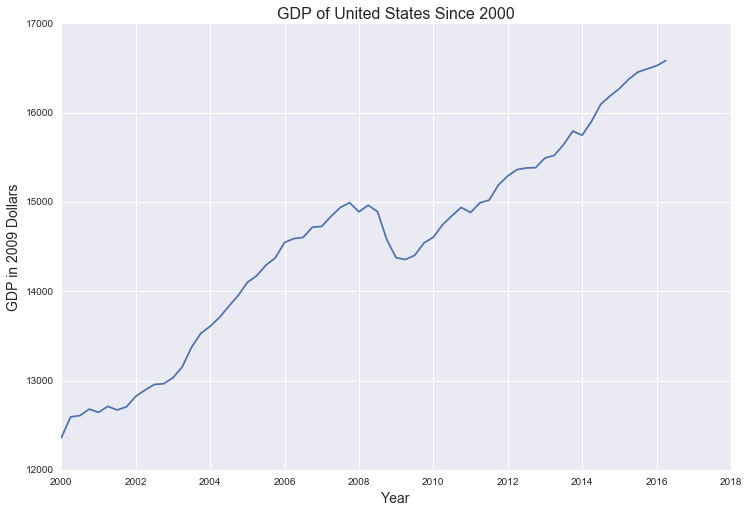

In [206]:
#DataFrame
gdp_df = get_gdp_df()

gdp_df['Quarter'] = fix_quarter_values(gdp_df['Quarter'])

plt.figure(figsize=(12,8))
plt.plot(gdp_df['Quarter'],gdp_df['GDP in 2009 Dollars'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP in 2009 Dollars', fontsize=14)
plt.title('GDP of United States Since 2000',fontsize=16)

This Graph shows that the GDP of the united states seemed to be steadily increasing from 2000 until 2008, in which there seemed to be a sharp downward turn in the GDP. Eventually the GDP seemed to resume a steady increase in GDP, which marked the turn around of the financial crisis.

This data is more a vizualization of the acctual occurance of the financial crisis of 2008. This project will further investigate how this crisis affected the housing market, and the median price of homes. To do this, we will need to be able to gather the acctual dates of the recession, which we will get below. 

In [212]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in the format yyyyq#'''
    
    gdp_data = get_gdp_df()
    for i,item in gdp_data.iterrows():
        if item['Change']<0 and gdp_data.loc[i+1]['Change']<0:
            return gdp_data.loc[i]['Quarter']
        
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in the format yyyyq#'''
    
    #Find location of recession start
    gdp_data = get_gdp_df()
    recession_start = get_recession_start()
    start_index = gdp_data[gdp_data['Quarter'] == recession_start].index.tolist()[0]
    
    #Now find Recession End
    gdp_data = gdp_data[start_index:]
    for i,item in gdp_data.iterrows():
        if item['Change']>0 and gdp_data.loc[i+1]['Change']>0:
            return gdp_data.loc[i+1]['Quarter']  
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in the format yyyyq#'''
    gdp_data = get_gdp_df()
    recession_start = get_recession_start()
    start_index = gdp_data[gdp_data['Quarter'] == recession_start].index.tolist()[0]
    recession_end = get_recession_end()
    end_index = gdp_data[gdp_data['Quarter'] == recession_end].index.tolist()[0]
    gdp_data = gdp_data[start_index:end_index]
    min_index = gdp_data['GDP in 2009 Dollars'].argmin()
    return gdp_data.loc[min_index]['Quarter']    
    
print "Recession Date Range"
print "Start:",get_recession_start(),"    End:", get_recession_end()
print
print "Recession Bottom:",get_recession_bottom()

Recession Date Range
Start: 2008q3     End: 2009q4

Recession Bottom: 2009q2


The clear dates associated with this project are therefore the following:
* The Recession officially started in the third quarter of 2008.
* The country was officially out of the recession by the end of 2009.
* The economy was at its worst during quarter 2 of 2009. 


With this now noticed, let's take a look at the housing data. 

## Housing Data Investigation

In [213]:
# Dictionary to map two letter acronyms to full State Names
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama',  'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'} 

In [214]:
# First need to create function to access Data
def convert_housing_data_to_quarters():
    '''Takes the housing data and converts it to a Dataframe with 
    average GDP per quarter from 2000-2016.
    '''
    #Set Up City DataFrame
    city_data = pd.read_csv('City_Zhvi_AllHomes.csv')
    city_data['State'].replace(states, inplace=True)
    city_data.set_index(["State","RegionName"], inplace=True)
    city_data.drop(city_data.columns[0:4], axis=1, inplace=True)
    
    #Fix Names of Columns
    new_columns=[]
    for column in city_data:
        new_columns.append(pd.to_datetime(column))
    city_data.columns = new_columns
    
    #Reformat DataFrame
    city_data = city_data.loc[:,"2000":]
    city_data = city_data.resample('QS', axis=1).mean()
    
    #Fix Nameing of Columns
    city_data = city_data.rename(columns=lambda x: timestamp_to_quarter(x))
    city_data.reset_index(inplace = True)
    
    return city_data

def timestamp_to_quarter(time):
    '''Helper Function to change months to Quarter ID in above function
    '''
    if time.month==1:
        quarter='q1'
    if time.month==4:
        quarter='q2'
    if time.month==7:
        quarter='q3'
    if time.month==10:
        quarter='q4'
    return str(time.year) + quarter

convert_housing_data_to_quarters().head()

,State,RegionName,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,...,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3,2016q4
0,New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,518933.333333,521800.000000,523566.666667,532500.000000,548000.000000,561466.666667,572633.333333,585333.333333,602300.000000,620933.333333
1,California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,...,508966.666667,517833.333333,526933.333333,535566.666667,545033.333333,556866.666667,568266.666667,581433.333333,590133.333333,604533.333333
2,Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,...,190166.666667,193566.666667,194900.000000,198900.000000,201533.333333,202700.000000,204033.333333,205833.333333,207866.666667,212300.000000
3,Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,...,115966.666667,116633.333333,116766.666667,117800.000000,120533.333333,122166.666667,123833.333333,126100.000000,130500.000000,132566.666667
4,Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,...,167500.000000,170533.333333,173333.333333,176500.000000,180500.000000,185166.666667,189066.666667,193166.666667,198566.666667,202833.333333


The above function will be used to gather the data. First let's vizualize how the median home price has changed over time on average accross the country. 

2006.5

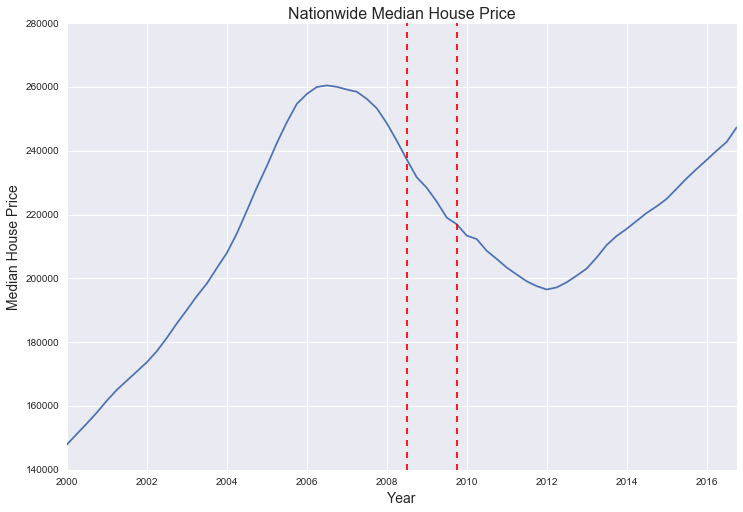

In [241]:
all_cities = convert_housing_data_to_quarters()
all_cities_mean = all_cities.mean()
all_cities_mean.index = fix_quarter_values(all_cities_mean.index)

#Plot
plt.figure(figsize=(12,8))
all_cities_mean.plot()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median House Price', fontsize=14)
plt.title('Nationwide Median House Price',fontsize=16)
plt.axvline(x=2008.5, linestyle='--',color='r')
plt.axvline(x=2009.75, linestyle='--',color='r')
all_cities_mean.argmax()

Unlike the GDP it seems that the average median housing price started to decrease before the recession started(denoted with the red lines),and continued to decrease after the recession ended. The recession was just a small portion of the time that the average home value was decreasing. For several years after the recession, housing prices were still decreasing Housing prices nationwide seem to still not have reached the same price as they were at their peak of 2006 quarter 3. 


There is a clear trend that the average price of a house in america reached its peak in 2006, and prices have not reached this peak since. However I want to investigate a few unique cities to see if this trend holds true in particular urban centers. These cities were chosen for no particular reason, and I am open to hearing more interesting cities worth investigating. 

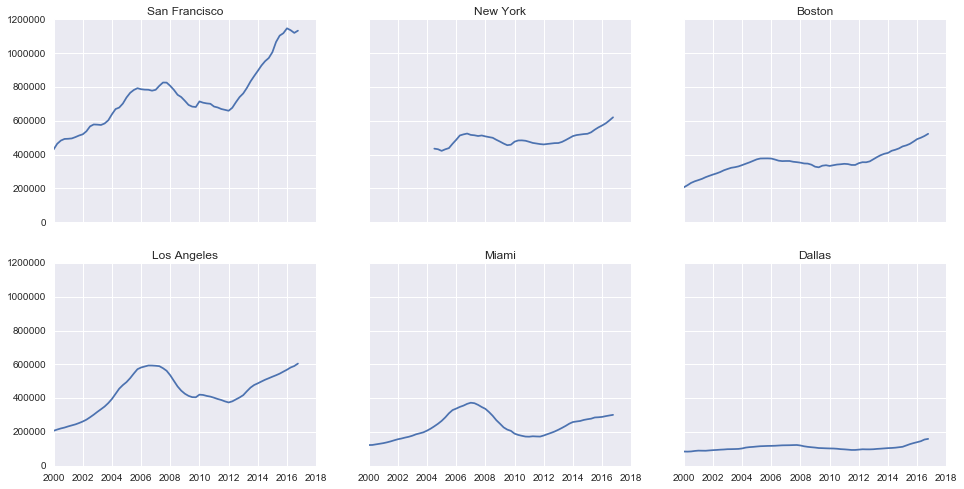

In [242]:
select_cities = all_cities[(all_cities['RegionName']=='New York')|(all_cities['RegionName']=='San Francisco')\
                     |(all_cities['RegionName']=='Dallas')|(all_cities['RegionName']=='Los Angeles')|\
                     (all_cities['RegionName']=='Boston')|(all_cities['RegionName']=='Miami')]
select_cities.reset_index(inplace=True, drop=True)
six_cities = select_cities.drop([6,7,8,9,10,11,12]).set_index(['RegionName'])
to_plot = six_cities.drop('State', axis=1).T
to_plot.index = fix_quarter_values(to_plot.index)


fs = 12
fig, axes =plt.subplots(nrows=2, ncols=3, figsize=(16,8), sharex=True, sharey=True)
axes[0,0].plot(to_plot['San Francisco'])
axes[0,0].set_title('San Francisco', fontsize=fs)

axes[0,1].plot(to_plot['New York'])
axes[0,1].set_title('New York', fontsize=fs)

axes[0,2].plot(to_plot['Boston'])
axes[0,2].set_title('Boston', fontsize=fs)

axes[1,0].plot(to_plot['Los Angeles'])
axes[1,0].set_title('Los Angeles', fontsize=fs)

axes[1,1].plot(to_plot['Miami'])
axes[1,1].set_title('Miami', fontsize=fs)

axes[1,2].plot(to_plot['Dallas'])
axes[1,2].set_title('Dallas', fontsize=fs)


There are clear differences between these cities I chose, and I am sure that each city would tell its own story. While San Francisco seemed to barely decrease in brice, and already has far surpassed its previous high. Then a city like Dallas seemed to have barely fluctuated. This is very interesting, noticing Ann Arbor, barely moved in price.

To further investigate, I want to create a tool to measure the ratio in differences from price from peak, too low. This will help evaluate which cities have seen a larger dip in prices compared to others. 

## Defining Price Ratio, and Looking at Cities

We will use the following definition of price ratio to show the price ratio of each city:

$$Price Ratio = \frac{Median\, Price\, of\, Home\, in\, 2008q2}{Median\, Price\, of\, Home\, in\, 2009q2}$$

Where 2008q2 is the quarter before the recession started, and 2009q2 is the bottom of the recession.

In [243]:
def get_price_ratio():
    '''Create dataframe with Price Ratio, of how much the price changed over time
    Returns Dataframe with State, Region, and Price Ratio Calculation.
    '''
    city_data = convert_housing_data_to_quarters()
    recession_bottom = get_recession_bottom()
    quart_s_rec = pd.to_datetime(get_recession_start())
    quart_b_rec = '{:}q{:}'.format(quart_s_rec.year, quart_s_rec.quarter-1)
    city_data['Price Ratio'] = city_data[quart_b_rec].div(city_data[recession_bottom])
    city_data.set_index(['State','RegionName'], inplace=True)
    return city_data['Price Ratio']

price_ratio = get_price_ratio()
price_ratio.dropna(inplace=True)
price_ratio.sort_values(inplace=True)


print "Bottom 20:"
print price_ratio[:20]

print""
print "Top 20:"
print price_ratio[-20:]

Bottom 20:
State        RegionName  
Mississippi  Smithville      0.645473
             Foxworth        0.648588
             Nettleton       0.659154
Montana      Belt            0.688914
Mississippi  Corinth         0.689612
             Glen            0.690175
New Mexico   Lamy            0.716361
             Silver City     0.719230
Mississippi  Farmington      0.731057
             Columbia        0.734120
New Mexico   Mesilla Park    0.747928
             Mesquite        0.758108
             Santa Fe        0.760255
Mississippi  Terry           0.761579
Montana      Clinton         0.766502
Mississippi  Enterprise      0.771135
Montana      Huson           0.772856
Louisiana    Choudrant       0.775973
             Marksville      0.776655
Mississippi  Aberdeen        0.777536
Name: Price Ratio, dtype: float64

Top 20:
State       RegionName       
Florida     Naranja              1.675539
California  Winton               1.676842
Florida     Opa-locka            1.683168
    

It seems that the least affected cities seemed to come from states and regions noted for often being rural, and not known for being highly populated. The most affected cities clearly seem to be from Florida and California, two states having large populations, and large amounts of land. 

# University Towns Vs. Other Housing Markets
## Statistical Test And Analysis

One thought worth invetigating, is taking a look if there are any general types of cities that are less affected by a recession than others. And one thought came to mind from an idea I had read about previously, that students tend to go to college during recessions. Thus I would assume that homes would be more in demand at university towns during recessions. Thus I wanted to test the following hypothesis using a statistical t-test. 

**Hypothesis**: University towns have their mean housing prices less effected by recessions than other types of towns. 

Here will be our definition of university town
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

I will use the list of college towns from wikipedia to determine my list of college towns.[university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) This list has beencopy and pasted into the file ```university_towns.txt```.


In [244]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list.'''
    
    text_file = open("university_towns.txt", "r")
    lines = text_file.readlines()
    final_list=[]
    for item in lines:
        if '[edit]' in item:
            end = item.find('[')
            item = item[:end]
            state = item
        else:
            end = item.find(' (')
            item = item[:end]
            final_list.append([state, item])
    final = pd.DataFrame(final_list, columns=["State", "RegionName"] )
    return final

print get_list_of_university_towns().head()
print
print len(get_list_of_university_towns()), "Total University Towns"

     State    RegionName
0  Alabama        Auburn
1  Alabama      Florence
2  Alabama  Jacksonville
3  Alabama    Livingston
4  Alabama    Montevallo

525 Total University Towns


In [245]:
def run_ttest():
    '''Function that runs a ttest comparing the university town values to the non-university town values.
    
    Returns the tuple (different, p, better) where:
    
    Different:
        True if the t-test is True at a p<0.01 (we reject the null hypothesis) 
        or 
        different=False if otherwise (we cannot reject the null hypothesis). 
        
    p:
        is the exact p value returned from scipy.stats.ttest_ind(). 
    
    better:
        Returns either "university town" or "non-university town"
        depending on which has a lower mean price ratio.'''
    
    #Get Dataframes from helper function
    df_college, df_non_college = college_vs_not_split()
    
    results = ttest_ind(df_college['Price Ratio'], df_non_college['Price Ratio'], nan_policy='omit')
    better = 0
    p= results.pvalue
    if p < .01:
        different = True
    else:
        different = False
        
    if df_college['Price Ratio'].mean() < df_non_college['Price Ratio'].mean():
        better = "university town"
        
    if df_college['Price Ratio'].mean() > df_non_college['Price Ratio'].mean():
        better = "non-university town"
        
    return (different, p, better)

def college_vs_not_split():
    """Helper function to split college town dataframe, and non college town dataframe.
    """
    #Get Data
    all_cities = pd.DataFrame(get_price_ratio()).reset_index()
    college_towns = get_list_of_university_towns()
    
    #Split Data into Dataframe of College Towns, and Dataframe of Non_College Towns
    indicator_df = pd.merge(college_towns, all_cities, how='outer', on=["State","RegionName"],indicator=True)
    
    df_college = indicator_df[(indicator_df['_merge']=='both')|(indicator_df['_merge']=='left_only')]
    df_non_college = indicator_df[(indicator_df['_merge']=='right_only')]
    final_college = df_college.drop('_merge', axis=1)
    final_not = df_non_college.drop('_merge', axis=1)
    return final_college, final_not

In [246]:
run_ttest()

(True, 0.0073686391567440272, 'university town')

In [247]:
df_college, df_non_college = college_vs_not_split()

df_college.dropna(inplace=True)
df_non_college.dropna(inplace=True)

print "College Town Mean Price Ratio:", df_college.mean()[0]
print
print "Other City Mean Price Ratio:", df_non_college.mean()[0]

College Town Mean Price Ratio: 1.05720417942

Other City Mean Price Ratio: 1.0758506228


The test above shows that there is in fact a statistically significant difference between the mean price ratio between college towns and other towns in the United States. The difference between 1.075 and 1.057 may not seem large, but after running this t test it is statistically significant. That means that there does in fact seem to be a difference bteween the two types of towns beyond just chance. This also shows that University towns are absolutely less affected by the recession than other types of towns. 

# Conclusions and Final thoughts 

# Work Cited
Inspiration for Project came from the University of Michigans Online Class "Introduction to Data Science in Python",
And can be found in the link below:
* https://www.coursera.org/learn/python-data-analysis

Housing Data:
* http://www.zillow.com/research/data/ 
* http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv

GDP Data:
* http://www.bea.gov/national/index.htm#gdp

College Town List from Wikipedia:
* https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States
